<a href="https://colab.research.google.com/github/lokesh7392/Alfido-Tech-Internship/blob/main/Sales_Performance_Analysis_AlfidoTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['superstore_final_dataset (1) (1).csv']), encoding='ISO-8859-1')
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


/tmp/ipython-input-32-3177968321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


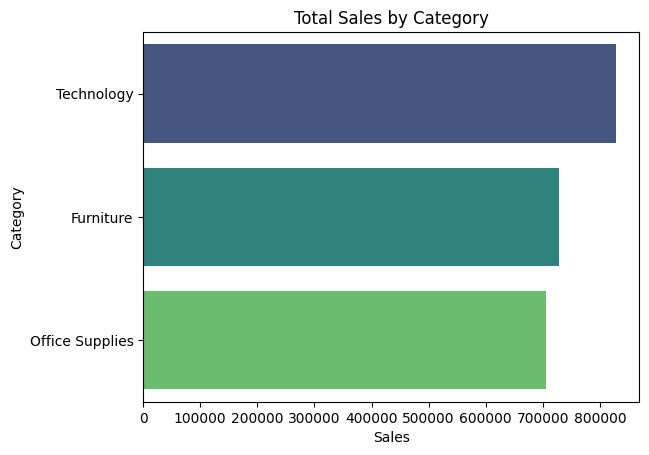

In [32]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.show()


/tmp/ipython-input-33-3735293133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


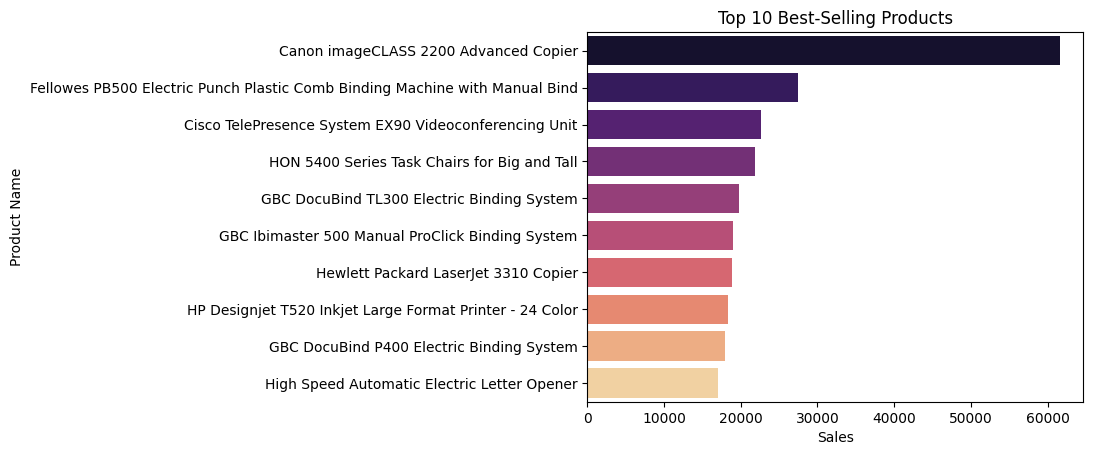

In [33]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.show()


/tmp/ipython-input-34-4050185639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')


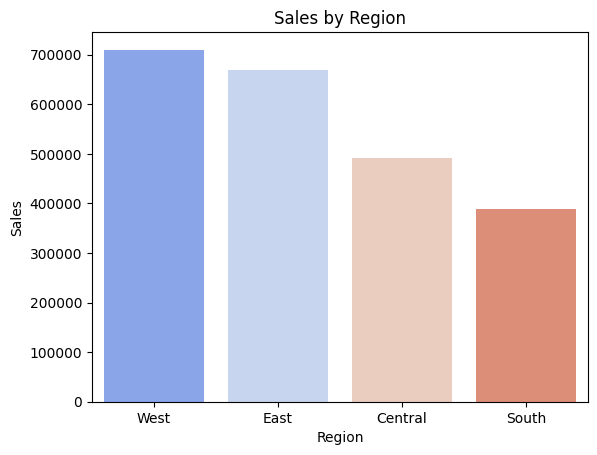

In [34]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.show()


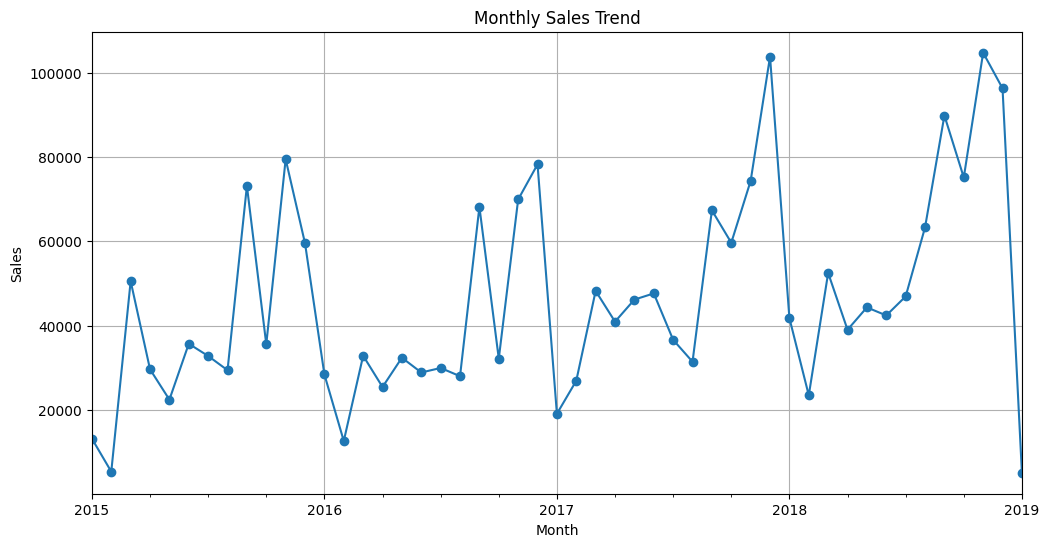

In [35]:
# Convert Ship_Date to datetime
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

# Set Ship_Date as index
df.set_index('Ship_Date', inplace=True)

# Resample monthly and sum sales
monthly_sales = df.resample('ME')['Sales'].sum()

# Plot the monthly sales
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(12,6), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()


In [40]:
import numpy as np
df['Profit'] = np.random.uniform(-100, 500, size=len(df))


/tmp/ipython-input-39-1609818721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_sales.index, y=ship_sales.values, palette='Set2')


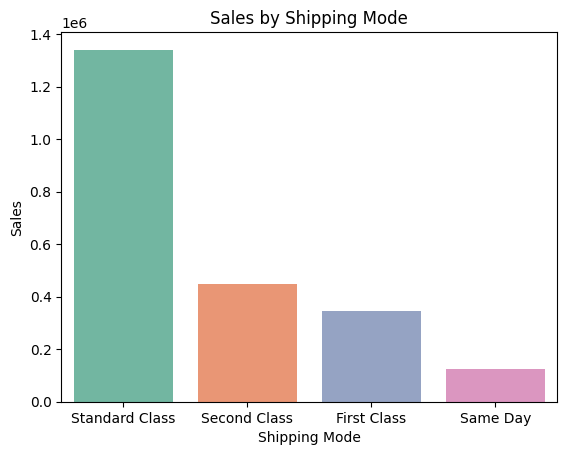

In [39]:
ship_sales = df.groupby('Ship_Mode')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=ship_sales.index, y=ship_sales.values, palette='Set2')
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()


In [42]:
print("📌 Summary:")
print(f"Top Category by Sales: {category_sales.idxmax()} - ₹{category_sales.max():.2f}")
print(f"Top Product: {top_products.idxmax()} - ₹{top_products.max():.2f}")
print(f"Top Region: {region_sales.idxmax()} - ₹{region_sales.max():.2f}")


📌 Summary:
Top Category by Sales: Technology - ₹827455.87
Top Product: Canon imageCLASS 2200 Advanced Copier - ₹61599.82
Top Region: West - ₹710219.68


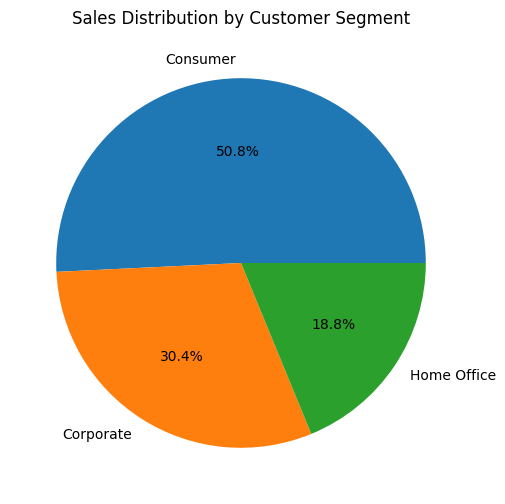

In [43]:
df.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Distribution by Customer Segment")
plt.ylabel("")
plt.show()
